In [1]:
import pandas as pd
import os
import sys
sys.path.append(os.path.abspath(os.path.join("..", "..")))
import packages.Preprocesamiento as ppr
import os
import datetime as dt
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import TweedieRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score,cross_validate, GridSearchCV

In [2]:
path_datos = os.path.join('..','..','Datos','Limpios')
filename = os.path.join(path_datos,'datos1_limpios.csv')
df = pd.read_csv(filename, index_col= 0)
df.head()

,ID,FECHA NAC,SEXO,NOMINA BRUTA 01/01/2025,FECHA ENTRADA,PARA CONTAR MESES,EDAD
0,1,1974-03-22,H,15319.07,2002-05-01,2002-05-01,51
1,2,1995-06-21,M,19168.80,2018-04-13,2018-05-01,30
2,3,1973-06-07,H,18719.86,2002-04-01,2002-04-01,52
3,4,1975-07-03,M,12942.60,2002-04-01,2002-04-01,50
4,5,1976-07-19,M,20158.08,2003-04-01,2003-04-01,49


In [3]:
path_datos = os.path.join('..','..','Datos','Limpios')
filename = os.path.join(path_datos,'datos2_limpios.csv')
df2 = pd.read_csv(filename, index_col= 0)
df2.head()

,Edad,Ingreso Anual (€),Porcentaje Ahorro (%),Ahorro Actual (€),Gasto Mensual (€),Vida Esperada (años),Edad de Jubilación,Años Hasta Jubilación
0,32,29353.06,7.26,25554.94,2268.62,81.29,67,35
1,51,39218.38,23.72,288438.59,2492.83,75.00,67,16
2,32,15000.00,11.14,20055.00,1110.73,78.70,65,33
3,30,23517.91,25.01,58819.72,1469.66,75.00,67,37
4,60,20867.64,23.96,200005.33,1322.29,81.47,62,2


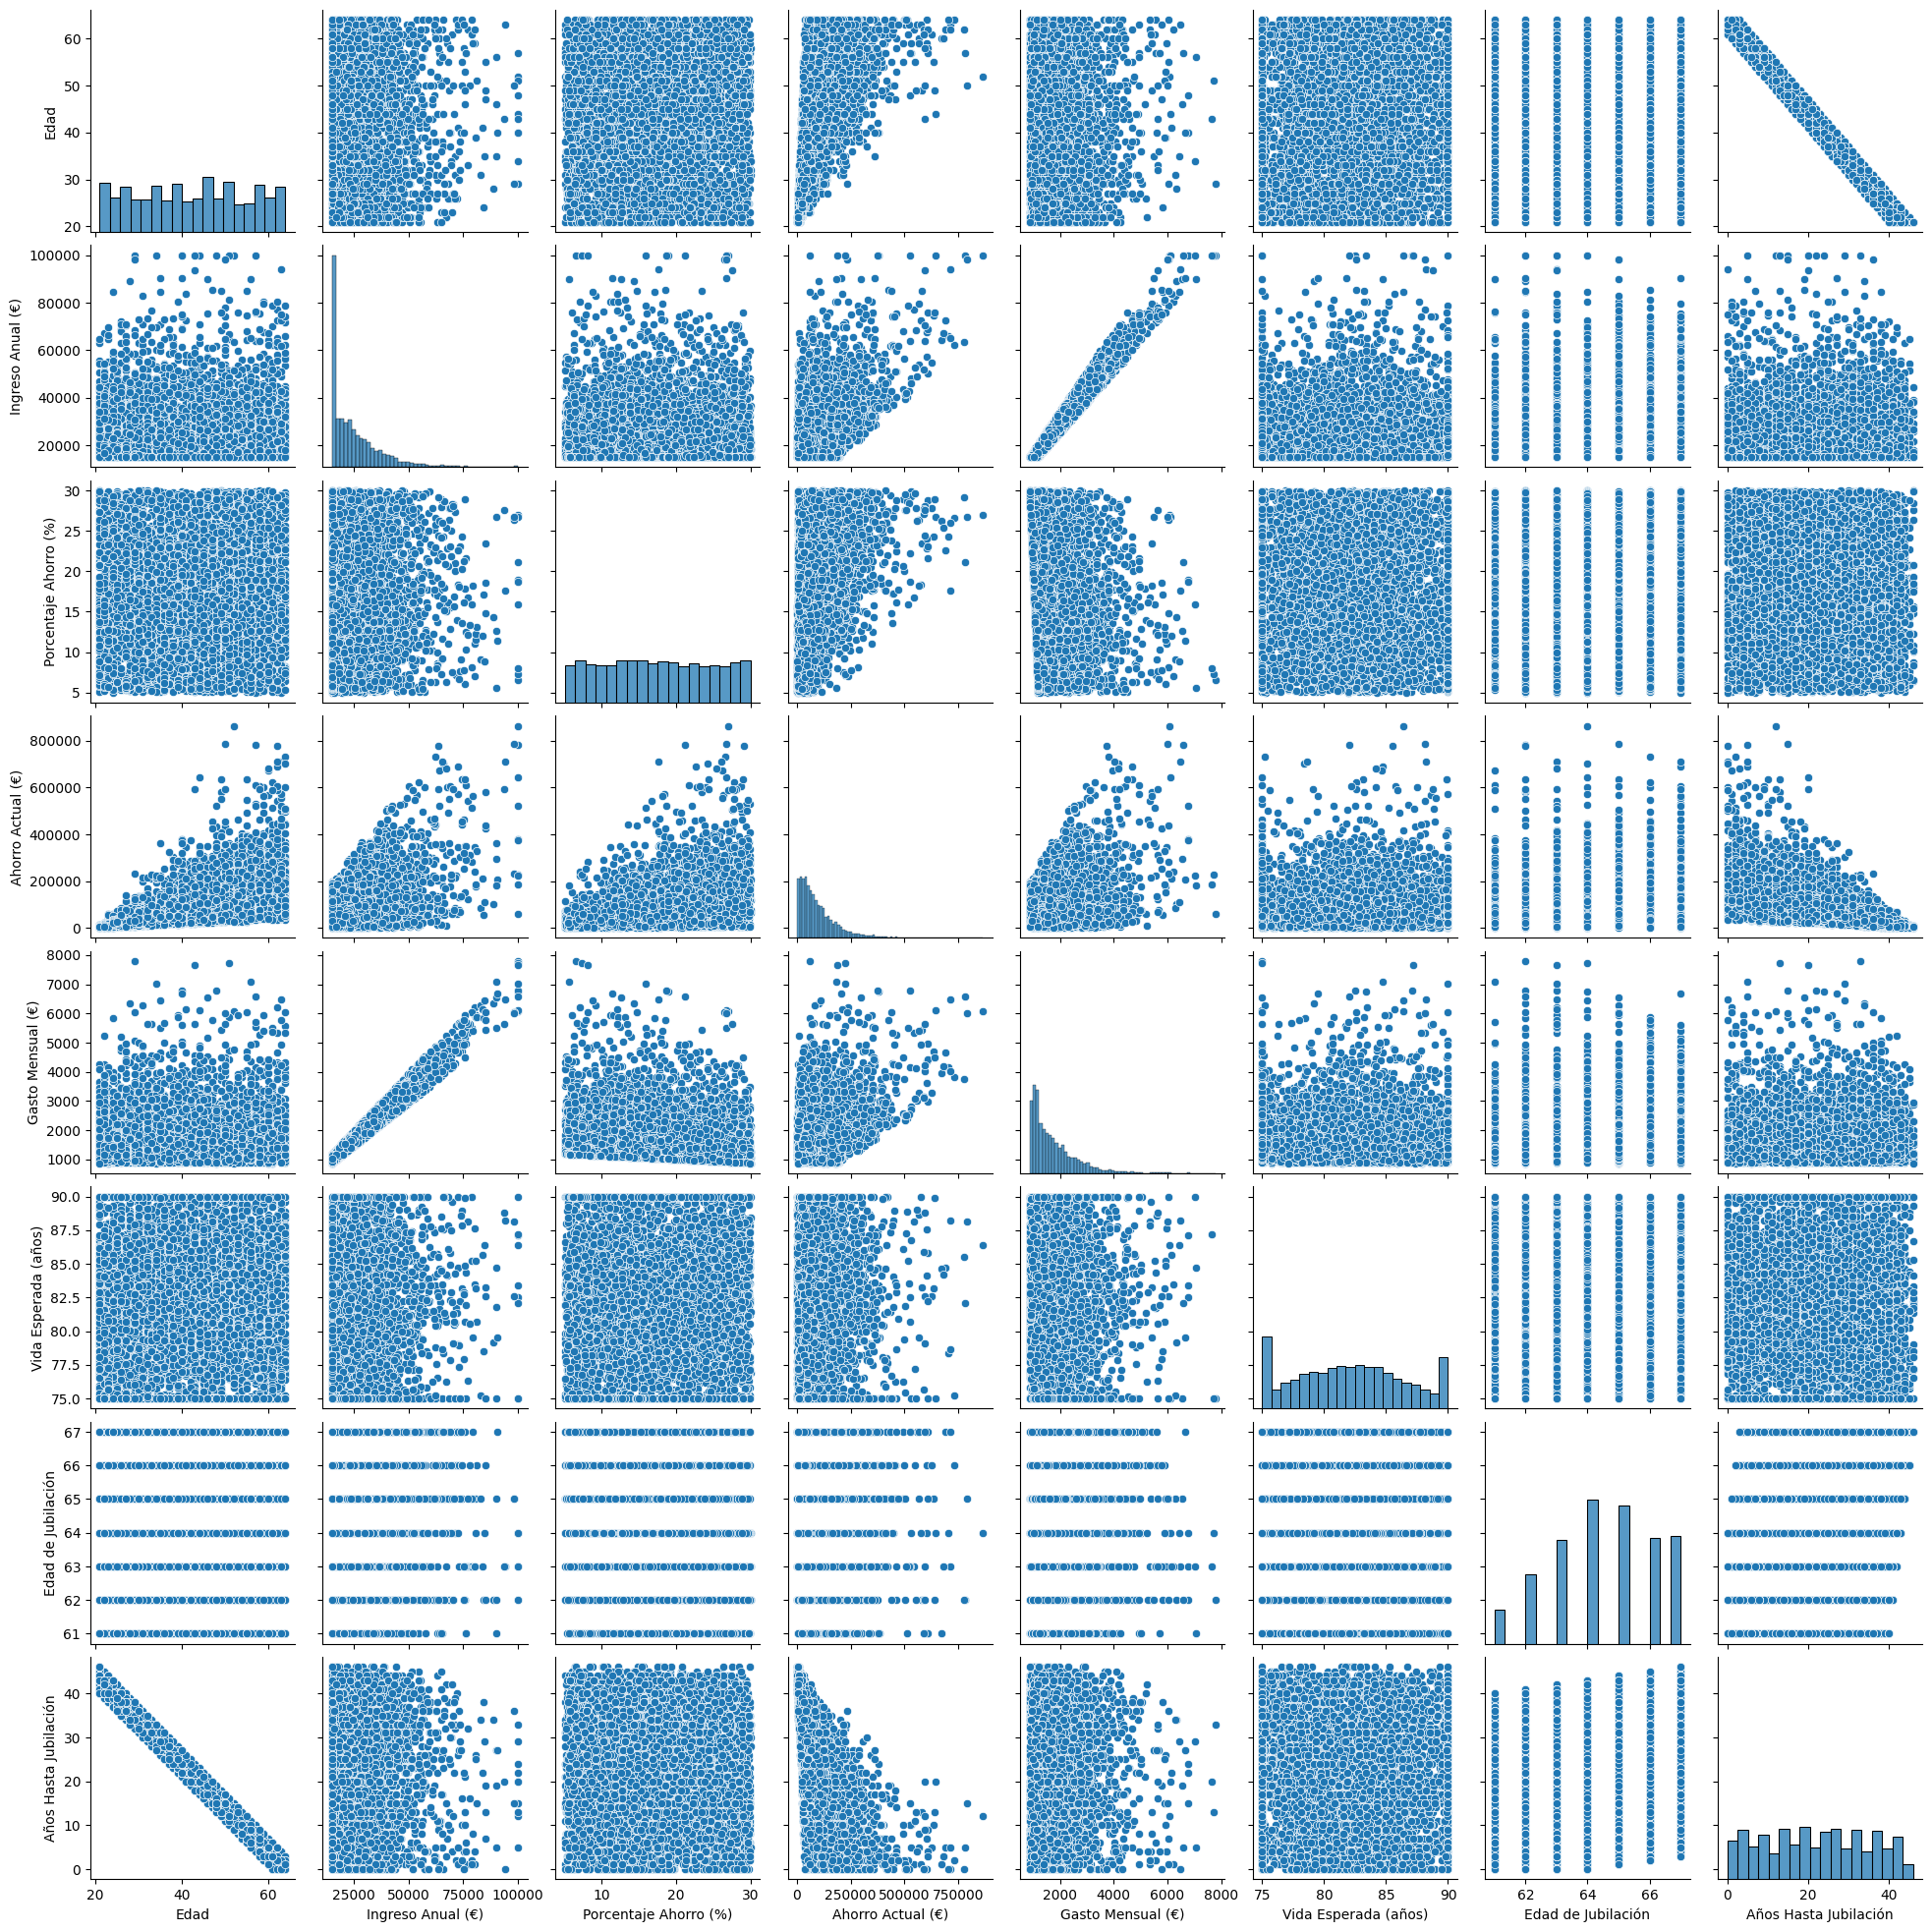

In [4]:
sns.pairplot(df2)

<Axes: >

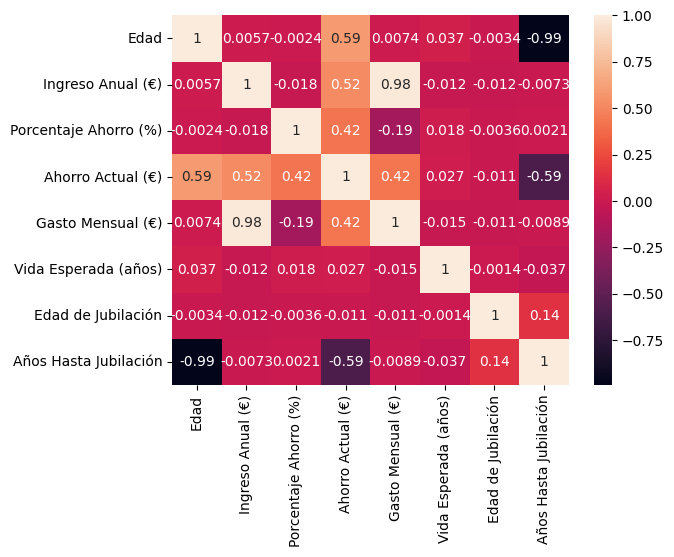

In [5]:
sns.heatmap(df2.corr(), annot=True)

In [14]:
df2.columns

Index(['Edad', 'Ingreso Anual (€)', 'Porcentaje Ahorro (%)',
       'Ahorro Actual (€)', 'Gasto Mensual (€)', 'Vida Esperada (años)',
       'Edad de Jubilación', 'Años Hasta Jubilación'],
      dtype='object')

In [ ]:
#'Edad', 'Porcentaje Ahorro (%)', 'Gasto Mensual (€)', 'Vida Esperada (años)',  'Edad de Jubilación', 'Años Hasta Jubilación'

In [13]:
df2_limpio = df2.drop(['Edad de Jubilación'], axis=1)
df2_limpio.describe()

,Edad,Ingreso Anual (€),Porcentaje Ahorro (%),Ahorro Actual (€),Gasto Mensual (€),Vida Esperada (años),Años Hasta Jubilación
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,42.392600,25851.308952,17.470874,100695.330698,1779.252052,82.077738,22.086000
std,12.622659,12820.844484,7.201479,95677.637143,901.772513,4.359988,12.722774
min,21.000000,15000.000000,5.010000,879.080000,875.250000,75.000000,0.000000
25%,32.000000,15617.382500,11.410000,35112.520000,1129.347500,78.640000,11.000000
50%,43.000000,22069.875000,17.370000,73946.975000,1507.150000,82.035000,22.000000
75%,53.000000,31068.317500,23.640000,135996.327500,2140.700000,85.290000,33.000000
max,64.000000,100000.000000,30.000000,864094.010000,7789.370000,90.000000,46.000000


In [14]:
X=df2_limpio.iloc[:,:6]
y=df2_limpio.iloc[:,-1]

In [15]:
models=[LinearRegression(),Lasso(max_iter=1000),Ridge(max_iter=1000),ElasticNet(max_iter=1000),TweedieRegressor(max_iter=10000)]

for model in models:
    cv_score=cross_validate(model,X,y,scoring=['neg_mean_absolute_error','r2'],cv=5)
    mean_mae = sum(cv_score['test_neg_mean_absolute_error'])/len(cv_score['test_neg_mean_absolute_error'])
    mean_r2 = sum(cv_score['test_r2'])/len(cv_score['test_r2'])
    print("MAE for model",model,'=',mean_mae)
    print("R2 for model",model,'=',mean_r2)

MAE for model LinearRegression() = -1.4381166111759442
R2 for model LinearRegression() = 0.9819942959900165
MAE for model Lasso() = -1.436122220204089
R2 for model Lasso() = 0.9818990689644103
MAE for model Ridge(max_iter=1000) = -1.4381162351518304
R2 for model Ridge(max_iter=1000) = 0.9819942971296834
MAE for model ElasticNet() = -1.4361451232948421
R2 for model ElasticNet() = 0.9818964569279007
MAE for model TweedieRegressor(max_iter=10000) = -1.4369699360199724
R2 for model TweedieRegressor(max_iter=10000) = 0.9818738101796581


In [ ]:
model_hyperparameters = {
    'lin_reg':{
      
    },
    'lasso_reg':{
        'alpha':[0.5,1,5,10,20]        
    },
    'ridge_reg':{
        'alpha':[0.5,1,5,10,20]        
    },
    'elastic_reg':{
        'alpha':[0.5,1,5,10,20],
        'l1_ratio':[0.1,0.3,0.5,0.7,0.9]        
    },
    'tweedie_reg':{
        'power':[0,1,2,3],
        'alpha':[0, 0.5, 1, 5, 10, 20],    
        'link':['log','identity']    
    }
}

In [ ]:
model_keys=list(model_hyperparameters.keys())

In [ ]:
result = []
i=0

for model in models:
    key=model_keys[i]
    i+=1
    params = model_hyperparameters[key]

    regressor=GridSearchCV(model,params,cv=5,scoring=['neg_mean_absolute_error','r2'],refit='neg_mean_absolute_error')

    regressor.fit(X,y)
    result.append({
        'model_used':model,
        'highest_score':regressor.best_score_,
        'best hyperparameters':regressor.best_params_
    })

In [ ]:
pd.DataFrame(result)